# 1.预处理共轭梯度法
### （1）代码：

In [3]:
import numpy as np
from numpy.linalg import inv,norm

#共轭梯度法
def cg(A,f,u,TOL,itmax):
    res=np.array(f)
    p=res
    f_norm=norm(f)
    res_old=0.0
    res_new=0.0
    for it in range(itmax):
        res_new=norm(res)
        print('itter,res=',it,res_new)
        if res_new<TOL*f_norm:
            break;
        if it==0:
            beta=0.0
        else:
            beta=res_new**2/res_old**2
        p=res+beta*p
        ap=A.dot(p)
        alpha=res_new**2/p.dot(ap)
        u+=alpha*p
        res-=alpha*ap
        res_old=res_new

#预处理共轭梯度法
def ycg(A,f,u,TOL,itmax,M):
    res=np.array(f)
    z=np.zeros(len(f))
    p=res
    f_norm=norm(f)
    res_old=0.0
    res_new=0.0
    for it in range(itmax):
        res_new=res.dot(z.T)
        print('itter,res=',it,norm(res))
        if norm(res)<TOL*f_norm:
            break;
        if it==0:
            beta=0.0
        else:
            beta=res_new/res_old
        z=inv(M).dot(res)
        p=z+beta*p
        ap=A.dot(p)
        res_new=res.dot(z.T)
        alpha=res_new/p.dot(ap)
        u+=alpha*p
        res-=alpha*ap
        res_old=res_new

Nx=int(input("输入Nx: "))
Ny=int(input("输入Ny: "))
K=int(input("输入最大迭代步数K: "))
TOL=float(input("输入控制精度: "))
N=(Nx+1)*(Ny+1)
A=np.diag([4]*N)
#构造系数矩阵A
for n in range(N):
    for m in range(N):
        if m==(n-Nx-1) or m==(n+Nx+1) or m==n-1 or m==n+1:
            A[n][m]=-1
b=np.ones(N)
#共轭梯度法计算u1
u1=np.zeros(N)
print("采用共轭梯度法：")
cg(A,b,u1,TOL,K)
print(u1)
#预处理共轭梯度法计算u2
u2=np.zeros(N)
M=np.diag([4]*N)
for i in range(N-1): #构造预处理矩阵M
    M[i][i+1]=A[i][i+1]
    M[i+1][i]=A[i+1][i]
print("采用预处理共轭梯度法：")
ycg(A,b,u2,TOL,K,M)
print(u2)

输入Nx: 1
输入Ny: 2
输入最大迭代步数K: 100
输入控制精度: 0.0001
采用共轭梯度法：
itter,res= 0 2.449489742783178
itter,res= 1 1.9999999999999998
itter,res= 2 0.1506131137016414
itter,res= 3 1.874785894044092e-16
[0.9047619  1.19047619 1.42857143 1.42857143 1.19047619 0.9047619 ]
采用预处理共轭梯度法：
itter,res= 0 2.449489742783178
itter,res= 1 1.025343984990944
itter,res= 2 0.07596999645317781
itter,res= 3 0.03180065527220345
itter,res= 4 0.002356180660931365
itter,res= 5 0.0009862852764970754
itter,res= 6 7.30760506270063e-05
[0.90473491 1.19044067 1.42852881 1.42852881 1.19044067 0.90473491]


### （2）代码：

k取1,2……10时共轭迭代次数依次为[ 2.  5.  8. 12. 15. 17. 20. 23. 26. 28.]


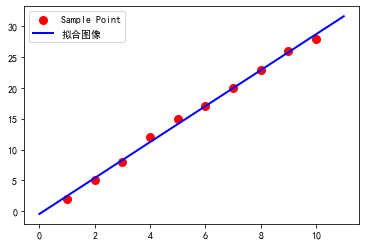

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
import numpy as np
from numpy.linalg import inv,norm

#共轭梯度法
def cg(A,f,u,TOL,itmax):
    res=np.array(f)
    p=res
    f_norm=norm(f)
    res_old=0.0
    res_new=0.0
    for it in range(itmax):
        res_new=norm(res)
        if res_new<TOL*f_norm:
            break;
        if it==0:
            beta=0.0
        else:
            beta=res_new**2/res_old**2
        p=res+beta*p
        ap=A.dot(p)
        alpha=res_new**2/p.dot(ap)
        u+=alpha*p
        res-=alpha*ap
        res_old=res_new
    return it
    
X=np.zeros(10)
K=range(1,11)
for k in K:
    Nx=k
    Ny=k
    N=(Nx+1)*(Ny+1)
    A=np.diag([4]*N)
    #构造系数矩阵A
    for n in range(N):
        for m in range(N):
            if m==(n-Nx-1) or m==(n+Nx+1) or m==n-1 or m==n+1:
                A[n][m]=-1
    b=np.ones(N)
    #共轭梯度法计算u
    u=np.zeros(N)
    X[k-1]=cg(A,b,u,1e-6,1000)
print("k取1,2……10时共轭迭代次数依次为{}".format(X))
#拟合
z1=np.polyfit(K,X,1)
p1=np.poly1d(z1)
#绘图
plt.figure()
plt.scatter(K,X,color='red',label="Sample Point",linewidth=3)
x=np.linspace(0,11,111)
y=p1(x)
plt.plot(x,y,color="blue",label="拟合图像",linewidth=2)
plt.legend()
plt.show()